____
# Análise dos óbitos por Covid-19 na Paraíba
____

## Autor
 * **Flávio Macaúbas Torres Filho** - flaviomacaubas@gmail.com

### Laboratório de Inteligência Artificial e Macroeconomia Computacional - LABIMEC

Análise descritiva e exploratória das informações de óbitos do estado da Paraíba, a base de dados é atualizada e mantida pelo próprio autor. O próposito da investigação é analisar o comportamento dos óbitos na Paraíba e diferentes tipos de agregação.

* Base categorizada nos campos: 
<ul> 
    <li>  <b>data_inicio:</b> data ao qual os sintomas começaram - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>data_obito:</b> data ao qual o paciente veio a óbito - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>cidade:</b> cidade originária do paciente (apenas cidades do território do estado da Paraíba) - <b>Tipo:</b> String (UTF-8)</li>
    <li>  <b>genero:</b> gênero do paciente - <b>Tipo:</b> String - <b>Valor:</b> homem ou mulher </li>
    <li>  <b>diabetes:</b> se o óbito tinha qualquer tipo de diabetes - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>hipertensao:</b> se o óbito hipertensao - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>cardiaco:</b> se o óbito tinha qualquer tipo cardiopatia - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>cancer:</b> se o óbito tinha qualquer tipo de neoplasias - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>neurologica:</b> se o óbito tinha qualquer tipo de doenças neurológicas (acidentes vasculares cerebrais inclusos) - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>obesidade:</b> se o óbito era obeso - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>respiratorias:</b> se o óbito tinha qualquer tipo de doenças respitarória - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>tabagismo:</b> se o óbito era fumante ou ex-fumante - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>outras:</b> se o óbito tinha todo e qualquer doença não descrita - <b>Tipo:</b> String - <b>Valor:</b> Sim ou Não</li>
    <li>  <b>hospital:</b> local de óbito da vítima - <b>Tipo:</b> String (UTF-8) - <b>Valor:</b> Público, privado, residência e transporte</li>
    <li>  <b>data_obito:</b> data ao qual o óbito foi notificado pela Secretaria de Saúde do Estado da Paraíba - <b>Tipo:</b> Timestamp - <b>Valor:</b> data formato YYYY/MM/DD</li>
    <li>  <b>fonte:</b> link no qual as informações foi divulgada no site do Governo do Estado da Paraíba - <b>Tipo:</b> String
<\ul>

In [428]:
# Importnado bibliotecas e módulos necessários

import pandas as pd # Pandas para manipulação de dataframes
from dfply import * # Importação dos módulos necessário para trabalhar com pipe em Python
import numpy as np # Operações matemáticas
import matplotlib.dates as mdates # Arrumar as datas no eixo

# Visualização dos dados
import seaborn as sns 
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline

In [429]:
# Configurações globais
sns.set_style('darkgrid') # background
sns.set_context('paper') # Formato artigo
plt.tight_layout()
# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 13,
          'figure.figsize': (15,7)}
plt.rcParams.update(parametros)

<Figure size 432x288 with 0 Axes>

In [430]:
# Leitura da base dados
try:
    df = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/perfil_paraiba.csv')
except:
    df = pd.read_csv('perfil_paraiba.csv')

In [431]:
#df = pd.read_csv('http://tecgeobr.com.br/csv/joao_pessoa/Dados20082020.csv',encoding = "ISO-8859-1", sep = ';' )

In [432]:
# 5 primeiros elementos
df.head()

,data_inicio,data_obito,cidade,genero,idade,diabetes,hipertenso,cardiaco,cancer,neurologica,obesidade,respiratorias,tabagismo,outras,hospital,data_notificao,fonte
0,2020-03-26,2020-03-31,Patos,homem,36.0,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Privado,2020-03-31,https://paraiba.pb.gov.br/diretas/saude/corona...
1,2020-03-25,2020-04-04,Junco do Seridó,mulher,86.0,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,Público,2020-04-03,https://paraiba.pb.gov.br/diretas/saude/corona...
2,2020-03-28,2020-04-02,João Pessoa,homem,43.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-03,https://paraiba.pb.gov.br/diretas/saude/corona...
3,2020-02-04,2020-04-04,João Pessoa,mulher,88.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-05,https://paraiba.pb.gov.br/diretas/saude/corona...
4,NaN,2020-03-30,Cabedelo,homem,71.0,SI,SI,SI,SI,SI,SI,SI,SI,SI,Privado,2020-04-08,https://paraiba.pb.gov.br/diretas/saude/corona...


In [433]:
# informações gerais da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 17 columns):
data_inicio       2338 non-null object
data_obito        2382 non-null object
cidade            2381 non-null object
genero            2382 non-null object
idade             2382 non-null float64
diabetes          2382 non-null object
hipertenso        2382 non-null object
cardiaco          2382 non-null object
cancer            2382 non-null object
neurologica       2382 non-null object
obesidade         2382 non-null object
respiratorias     2382 non-null object
tabagismo         2382 non-null object
outras            2382 non-null object
hospital          2378 non-null object
data_notificao    2382 non-null object
fonte             2382 non-null object
dtypes: float64(1), object(16)
memory usage: 316.4+ KB


# Contabilizando mortes por dia e data de notificação e acumulando

In [434]:
# Agrupa por data de óbito e acumula
mortes = (df >> group_by('data_obito') 
          >> summarize( mortes = n(X.data_obito)) 
          >> ungroup() 
          >> mutate (mortes_acumuladas = cumsum(X.mortes)))

# Agrupa por data de notificação
mortes_noti = (df >> group_by('data_notificao') 
               >> summarize(mortes_noti = n(X.data_notificao)) 
               >> rename(data_obito = 'data_notificao'))

# Leftjoin para preservar dados que não fazem parte do conjunto união
mortes = mortes >> left_join(mortes_noti, by = 'data_obito')

# Preenche NaN por 0 (para acumular corretamente)
mortes['mortes_noti'] = mortes['mortes_noti'].fillna(0)

# Cria acumulados por data de notificação, tem de suceder o preenchimento de NaNs
mortes = mortes >> mutate(mortes_noti_acumuladas = cumsum(X.mortes_noti))

# A rigor, qualquer 1 das datas pode ser usada como index
mortes.index = mortes['data_obito']

# Retira coluna de datas após setar index, ela passa a ser redundante, caso alguém queirar fazer algum tipo de merge, pode ser deparar com valores ambíguos.
mortes = mortes >> drop(X.data_obito)

mortes.head()

,mortes,mortes_acumuladas,mortes_noti,mortes_noti_acumuladas
data_obito,,,,
2020-03-24,1,1,0.0,0.0
2020-03-30,2,3,0.0,0.0
2020-03-31,2,5,1.0,1.0
2020-04-02,1,6,0.0,1.0
2020-04-04,3,9,0.0,1.0


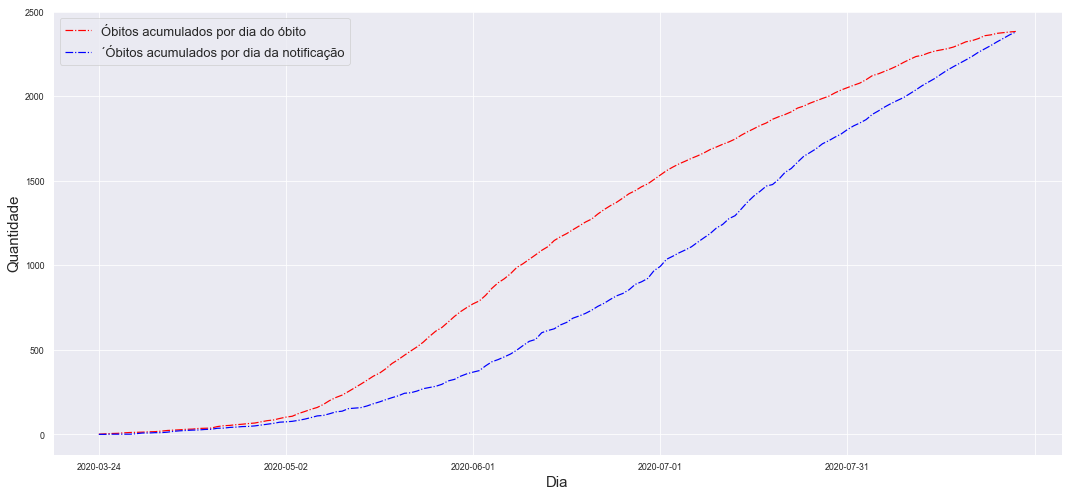

In [435]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Quantidade', fontsize = 15) # Eixo y
ax1.plot(mortes.index, mortes['mortes_acumuladas'], 'r-.', label = 'Óbitos acumulados por dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mortes_noti_acumuladas'], 'b-.', label = '´Óbitos acumulados por dia da notificação') # gráfico de linha
ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'



ax1.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define a quantidade de label

fig.tight_layout()  # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações

fig.savefig('mortes_pb.png')

# Peparando média móvel

O método utilizado é o Média Móvel Simples (MMS), o propósito é mostrar a tendência dessas curvas e suavizar oscilações sazonais e abruptas. A fórmula utilizada pode ser descrita pelo seguinte processo gerador:

### $\bar{p_{i}} = \frac{p_{i+1} + ... + p_{i+n}}{n}$
### $= \frac{1}{n}\sum_{j=1}^{n}p_{i+j}$
### $\bar{p_{i+1}} = \bar{p_{i}} + \frac{p_{n+i+1}}{n} - \frac{p_{n+1}}{n}$

In [436]:
# Adiciona a base de dados as médias móveis para diferentes dias
mortes = (mortes >> mutate(mm_14 = X.mortes.rolling(window = 14).mean()) 
          >> mutate(mm_11 = X.mortes.rolling(window = 5).mean()) 
          >> mutate(mm_7 = X.mortes.rolling(window = 7).mean()) 
          >> mutate(mm_noti_14 = X.mortes_noti.rolling(window = 14).mean())
          >> mutate(mm_noti_11 = X.mortes_noti.rolling(window = 5).mean())
          >> mutate(mm_noti_7 = X.mortes_noti.rolling(window = 7).mean()))


mortes.tail()

,mortes,mortes_acumuladas,mortes_noti,mortes_noti_acumuladas,mm_14,mm_11,mm_7,mm_noti_14,mm_noti_11,mm_noti_7
data_obito,,,,,,,,,,
2020-08-23,5,2362,20.0,2299.0,11.642857,11.4,11.714286,22.000000,21.0,20.857143
2020-08-24,9,2371,22.0,2321.0,11.000000,10.0,11.571429,21.928571,21.4,21.000000
2020-08-25,4,2375,20.0,2341.0,10.071429,9.4,10.000000,21.714286,21.2,21.000000
2020-08-26,4,2379,21.0,2362.0,9.857143,7.8,8.285714,21.428571,20.6,21.142857
2020-08-27,3,2382,17.0,2379.0,9.071429,5.0,7.714286,21.142857,20.0,20.571429


# Analisando por data de notificação

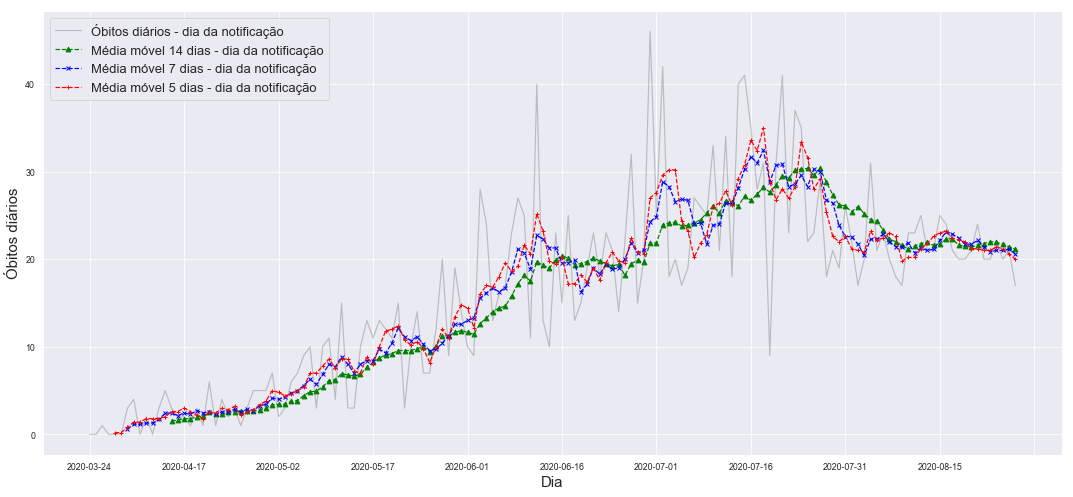

In [437]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo y
ax1.plot(mortes.index, mortes['mortes_noti'], 'k', label = 'Óbitos diários - dia da notificação ', alpha = 0.2) # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_14'], 'g--^', label = 'Média móvel 14 dias - dia da notificação') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_7'], 'b--x', label = 'Média móvel 7 dias - dia da notificação') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_11'], 'r--+', label = 'Média móvel 5 dias - dia da notificação') # gráfico de linha

ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

ax1.xaxis.set_major_locator(plt.MaxNLocator(15)) # Define a quantidade de label

fig.tight_layout()  # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações

fig.savefig('mm_noti_11_14_pb.png')

# Analisando por data do óbito

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


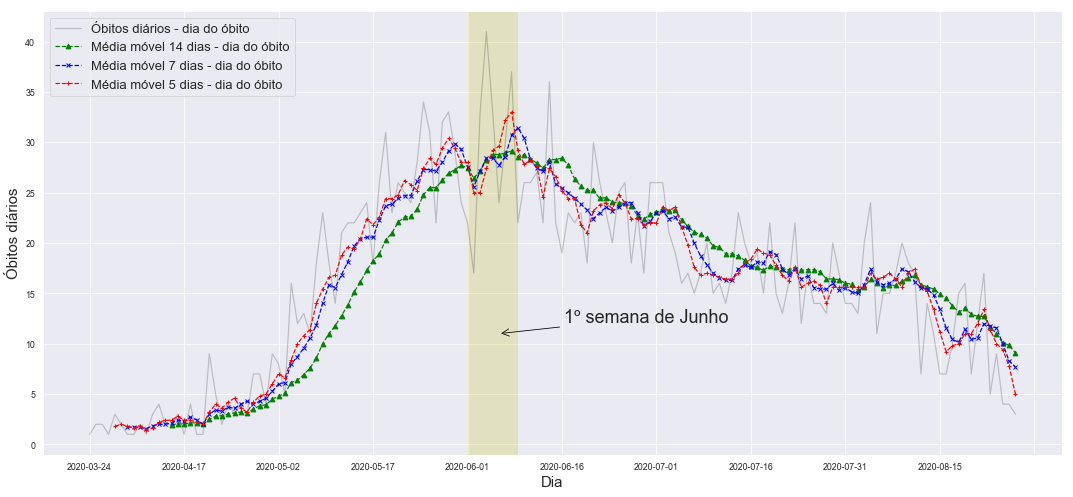

In [438]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo Y
ax1.plot(mortes.index, mortes['mortes'], 'k-', label = 'Óbitos diários - dia do óbito', alpha = 0.2) # gráfico de linha
ax1.plot(mortes.index, mortes['mm_14'], 'g--^', label = 'Média móvel 14 dias - dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_7'], 'b--x', label = 'Média móvel 7 dias - dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_11'], 'r--+', label = 'Média móvel 5 dias - dia do óbito') # gráfico de linha
ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

# Zona da 1 semana de junho
plt.axvspan(mortes.index[60], mortes.index[68], color='y', alpha=0.2, lw=0)

# Anotações
plt.annotate('1º semana de Junho', 
             xy=(mortes.index[65], mortes['mortes'].max() - 30), 
             xycoords='data',
             textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color = 'black'),  
             size = 18)

ax1.xaxis.set_major_locator(plt.MaxNLocator(15))  # Define a quantidade de label

fig.tight_layout()   # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações
fig.savefig('mm_11_14_pb.png')

## Média móvel exponencial

In [439]:
# Adiciona a base de dados as médias móveis para diferentes dias
mortes = (mortes >> mutate(mm_14 = X.mortes.ewm(span=14, adjust=False).mean()) 
          >> mutate(mm_11 = X.mortes.ewm(span=5, adjust=False).mean()) 
          >> mutate(mm_7 = X.mortes.ewm(span=7, adjust=False).mean()) 
          >> mutate(mm_noti_14 = X.mortes_noti.ewm(span=14, adjust=False).mean())
          >> mutate(mm_noti_11 = X.mortes_noti.ewm(span=5, adjust=False).mean())
          >> mutate(mm_noti_7 = X.mortes_noti.ewm(span=7, adjust=False).mean()))


mortes.tail()

,mortes,mortes_acumuladas,mortes_noti,mortes_noti_acumuladas,mm_14,mm_11,mm_7,mm_noti_14,mm_noti_11,mm_noti_7
data_obito,,,,,,,,,,
2020-08-23,5,2362,20.0,2299.0,11.898092,10.482993,10.894999,21.540735,20.908379,21.101126
2020-08-24,9,2371,22.0,2321.0,11.511680,9.988662,10.421250,21.601971,21.272253,21.325844
2020-08-25,4,2375,20.0,2341.0,10.510123,7.992441,8.815937,21.388375,20.848169,20.994383
2020-08-26,4,2379,21.0,2362.0,9.642106,6.661628,7.611953,21.336591,20.898779,20.995787
2020-08-27,3,2382,17.0,2379.0,8.756492,5.441085,6.458965,20.758379,19.599186,19.996840


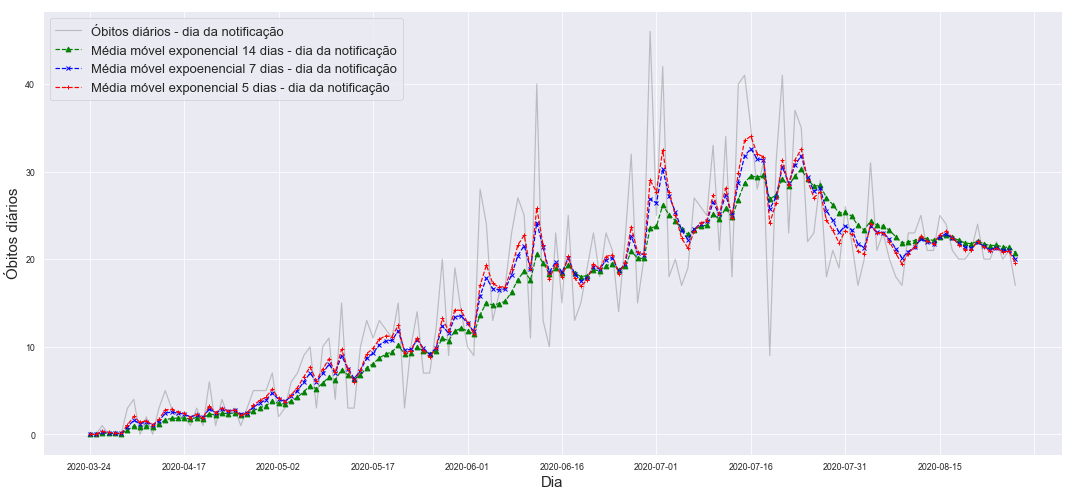

In [440]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo y
ax1.plot(mortes.index, mortes['mortes_noti'], 'k', label = 'Óbitos diários - dia da notificação ', alpha = 0.2) # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_14'], 'g--^', label = 'Média móvel exponencial 14 dias - dia da notificação') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_7'], 'b--x', label = 'Média móvel expoenencial 7 dias - dia da notificação') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_noti_11'], 'r--+', label = 'Média móvel exponencial 5 dias - dia da notificação') # gráfico de linha

ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

ax1.xaxis.set_major_locator(plt.MaxNLocator(15)) # Define a quantidade de label

fig.tight_layout()  # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações

fig.savefig('mme_noti_11_14_pb.png')

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


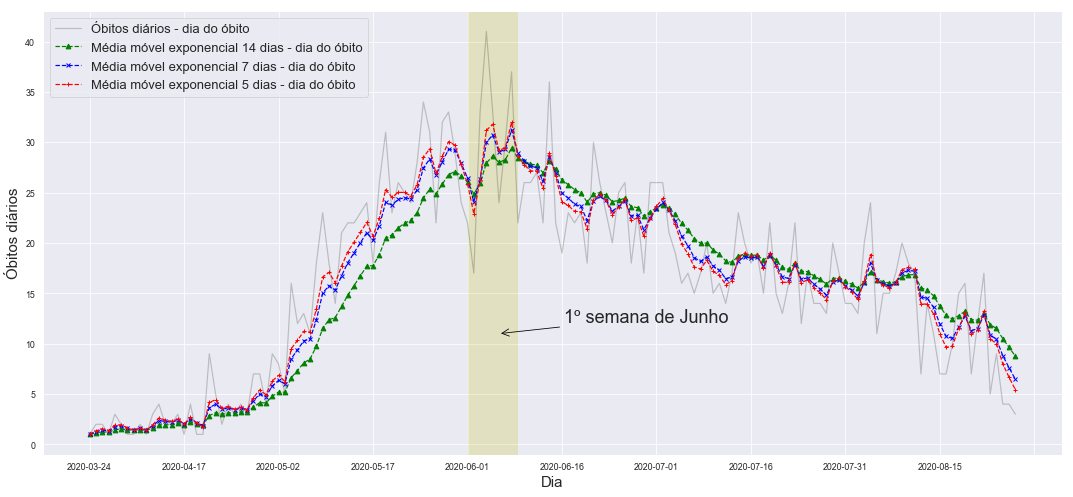

In [441]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo Y
ax1.plot(mortes.index, mortes['mortes'], 'k-', label = 'Óbitos diários - dia do óbito', alpha = 0.2) # gráfico de linha
ax1.plot(mortes.index, mortes['mm_14'], 'g--^', label = 'Média móvel exponencial 14 dias - dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_7'], 'b--x', label = 'Média móvel exponencial 7 dias - dia do óbito') # gráfico de linha
ax1.plot(mortes.index, mortes['mm_11'], 'r--+', label = 'Média móvel exponencial 5 dias - dia do óbito') # gráfico de linha

ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

# Zona da 1 semana de junho
plt.axvspan(mortes.index[60], mortes.index[68], color='y', alpha=0.2, lw=0)

# Anotações
plt.annotate('1º semana de Junho', 
             xy=(mortes.index[65], mortes['mortes'].max() - 30), 
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color = 'black'),  
             size = 18)

ax1.xaxis.set_major_locator(plt.MaxNLocator(15))  # Define a quantidade de label

fig.tight_layout()   # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações
fig.savefig('cidades\mme_11_14_pb.png')

In [442]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Suavização Exponencial Simples

In [443]:
fit3 = SimpleExpSmoothing(mortes.mortes).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


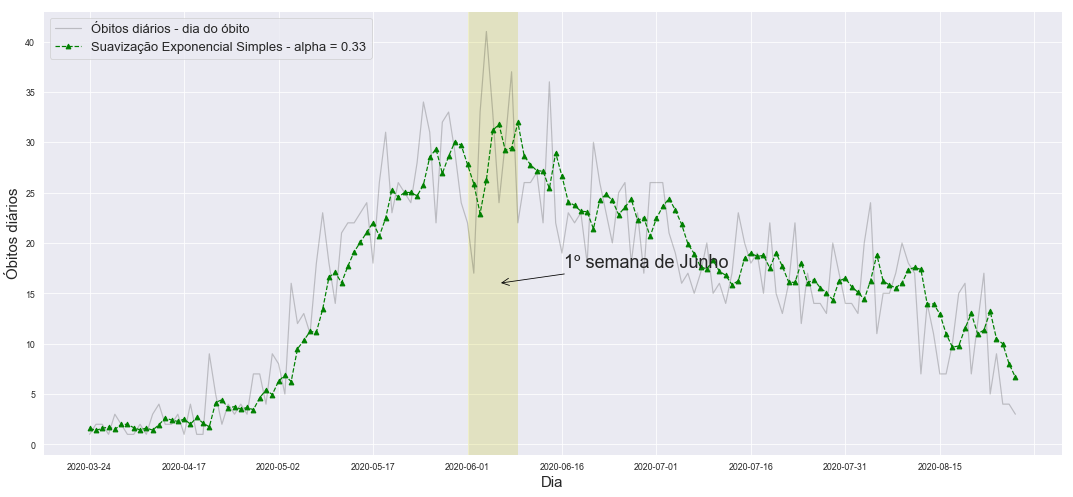

In [444]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo Y
ax1.plot(mortes.index, mortes['mortes'], 'k-', label = 'Óbitos diários - dia do óbito', alpha = 0.2) # gráfico de linha
ax1.plot(fit3.fittedvalues.index, fit3.fittedvalues.values, 'g--^', label = 'Suavização Exponencial Simples - alpha = {:.2f}'.format(fit3.model.params['smoothing_level'])) # gráfico de linha
ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

# Zona da 1 semana de junho
plt.axvspan(mortes.index[60], mortes.index[68], color='y', alpha=0.2, lw=0)

# Anotações
plt.annotate('1º semana de Junho', 
             xy=(mortes.index[65], mortes['mortes'].max() - 25), 
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color = 'black'),  
             size = 18)

ax1.xaxis.set_major_locator(plt.MaxNLocator(15))  # Define a quantidade de label

fig.tight_layout()   # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações
fig.savefig('exp_simp_suav_mortes.png')

# Holt

In [445]:
fit2 = Holt(mortes.mortes, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fit3 = Holt(mortes.mortes, exponential=True).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)
fit4 = Holt(mortes.mortes, exponential=True).fit(smoothing_level=0.2, smoothing_slope=0.8, optimized=False)

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


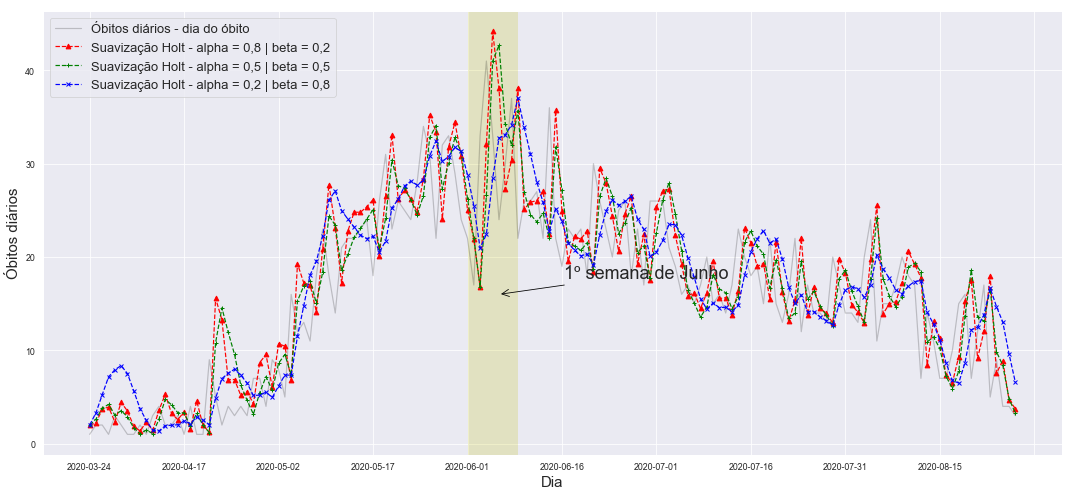

In [446]:
# Visualizando
fig, ax1 = plt.subplots()

ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo Y
ax1.plot(mortes.index, mortes['mortes'], 'k-', label = 'Óbitos diários - dia do óbito', alpha = 0.2) # gráfico de linha
ax1.plot(fit2.fittedvalues.index, fit2.fittedvalues.values, 'r--^', label = 'Suavização Holt - alpha = 0,8 | beta = 0,2') # gráfico de linha
ax1.plot(fit3.fittedvalues.index, fit3.fittedvalues.values, 'g--+', label = 'Suavização Holt - alpha = 0,5 | beta = 0,5') # gráfico de linha
ax1.plot(fit4.fittedvalues.index, fit4.fittedvalues.values, 'b--x', label = 'Suavização Holt - alpha = 0,2 | beta = 0,8') # gráfico de linha

ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

# Zona da 1 semana de junho
plt.axvspan(mortes.index[60], mortes.index[68], color='y', alpha=0.2, lw=0)

# Anotações
plt.annotate('1º semana de Junho', 
             xy=(mortes.index[65], mortes['mortes'].max() - 25), 
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color = 'black'),  
             size = 18)

ax1.xaxis.set_major_locator(plt.MaxNLocator(15))  # Define a quantidade de label

fig.tight_layout()   # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações
fig.savefig('holt_mortes.png')

# Holt-Winters

In [447]:
hw_add = ExponentialSmoothing(mortes.mortes, seasonal_periods=7, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:2178: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


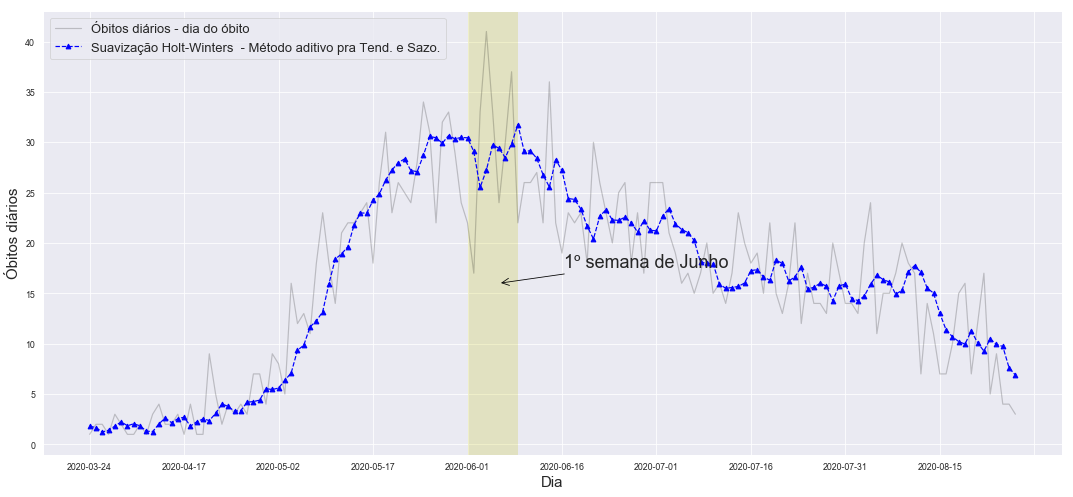

In [448]:
# Visualizando
fig, ax1 = plt.subplots()



ax1.set_xlabel('Dia', fontsize = 15) # Eixo x
ax1.set_ylabel('Óbitos diários', fontsize = 15) # Eixo Y
ax1.plot(mortes.index, mortes['mortes'], 'k-', label = 'Óbitos diários - dia do óbito', alpha = 0.2) # gráfico de linha
ax1.plot(hw_add.fittedvalues.index, hw_add.fittedvalues.values, 'b--^', label = 'Suavização Holt-Winters  - Método aditivo pra Tend. e Sazo.') # gráfico de linha


ax1.legend(loc = 'upper left') # Caso queira que isso seja decidido automaticamente, mudar o valor do atributo para 'best'

# Zona da 1 semana de junho
plt.axvspan(mortes.index[60], mortes.index[68], color='y', alpha=0.2, lw=0)

plt.autoscale(enable=True, axis=u'both')

# Anotações
plt.annotate('1º semana de Junho', 
             xy=(mortes.index[65], mortes['mortes'].max() - 25), 
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color = 'black'),  
             size = 18)

ax1.xaxis.set_major_locator(plt.MaxNLocator(15))  # Define a quantidade de label


fig.tight_layout()   # Ajusta layout, últil para salvar os gráficos sem correr o perigo de cortar informações
fig.savefig('hw_mortes.png')